<a href="https://colab.research.google.com/github/PrasoonPratham/Kaggle/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My solution for the MNIST dataset.


---
![MNIST Dataset](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png)

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Source : [Kaggle](https://www.kaggle.com/c/digit-recognizer)


> In this notebook I will attempt to make a machine learning model for the MNIST dataset.

You can follow me on Twitter : [@PrasoonPratham](https://twitter.com/PrasoonPratham)

In [ ]:
#Using the Kaggle API to fetch the dataset for this competition

!pip install kaggle
api_token = {"username":"prathamsbot","key":"31df8eaf691eda54bf2ca336d9d59eb6"}
import json
import zipfile
import os
!mkdir /root/.kaggle
!echo '{"username":"USERNAME","key":"API_KEY"}' > /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!kaggle competitions download -c digit-recognizer

In [5]:
#Renaming files as certain issues are caused with the default ones
%%bash
mv /content/train.csv.zip /content/traincsv.zip
mv /content/test.csv.zip /content/testcsv.zip

In [6]:
#Unzipping training data
zip_ref = zipfile.ZipFile('/content/traincsv.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
#Unzipping test data
zip_ref = zipfile.ZipFile('/content/testcsv.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [8]:
#Making Dataframes
import pandas as pd
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

In [9]:
#Importing numpy and tensorflow
import numpy as np
import tensorflow as tf

In [10]:
#Training labels set
Y_train = train_data["label"]

# Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1) 

In [11]:
#Normalizing data for better performance
X_train = X_train/255.0
test_data = test_data/255.0

#Reshaping Data
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [12]:
#Splitting training data for training and validation 
from sklearn.model_selection import train_test_split

X1_train,Y1_train,X2_train,Y2_train=train_test_split(X_train,Y_train,test_size = 0.1, random_state=2)

In [13]:
#Model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),                      
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
results = model.evaluate(Y1_train, Y2_train, batch_size=32)

132/132 [==============================] - 0s 2ms/step - loss: 2.3015 - accuracy: 0.1060


In [ ]:
print("Fit model on training data")
history = model.fit(
    X1_train,
    X2_train,
    batch_size=32,
    epochs=15,
    validation_data=(Y1_train, Y2_train),
)

<Figure size 432x288 with 0 Axes>

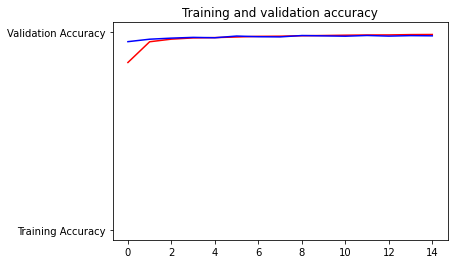

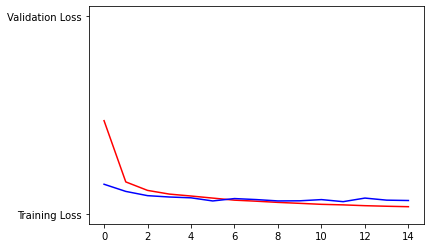

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [19]:
predicted_classes = model.predict_classes(test_data)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)

In [ ]:
#Kills google collab instance
import os, signal
os.kill(os.getpid(), signal.SIGKILL)